In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_gen=datagen.flow_from_directory(
    '/content/drive/MyDrive/styles_dataset',
    target_size=(128,128),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

Found 172 images belonging to 4 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
val_gen=datagen.flow_from_directory(
    '/content/drive/MyDrive/styles_dataset',
    target_size=(128,128),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 42 images belonging to 4 classes.


In [ ]:
num_classes = len(train_gen.class_indices)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # <-- dynamic number of classes
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(train_gen.class_indices)

{'aesthetic': 0, 'modern': 1, 'neutral': 2, 'vintage': 3}


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=val_gen, epochs=5)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 473ms/step - accuracy: 0.9359 - loss: 0.2597 - val_accuracy: 0.2619 - val_loss: 1.9830
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 1.0000 - loss: 0.0677 - val_accuracy: 0.2857 - val_loss: 2.2945
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 1.0000 - loss: 0.0117 - val_accuracy: 0.3333 - val_loss: 3.2708
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.2857 - val_loss: 3.5256
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.2619 - val_loss: 4.5395


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted style: modern


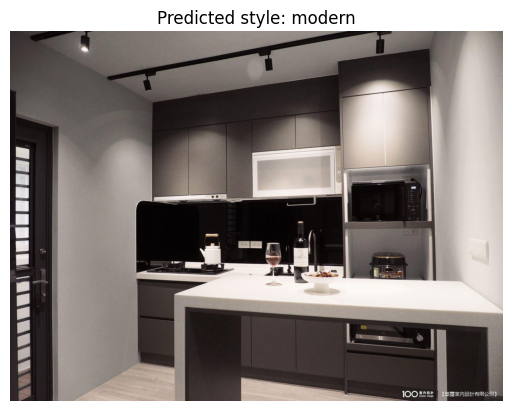

In [ ]:
img_path = '/content/drive/MyDrive/image_9.jpg'
img = image.load_img(img_path, target_size=(128,128))
x = image.img_to_array(img)/255.0
x = np.expand_dims(x, axis=0)
pred = model.predict(x)
predicted_label = list(train_gen.class_indices.keys())[pred.argmax()]
print("Predicted style:", predicted_label)

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted style: {predicted_label}")
plt.axis('off')
plt.show()
